In [2]:
import pandas as pd 
import numpy as np 
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
#경고무시
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [4]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정 / 개인 자유
plt.style.use("ggplot")

# 데이터 불러오기 

In [5]:
import pandas as pd

df = pd.read_csv('./company_nps_data.csv', encoding='cp949')
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [6]:
# 이후 plot을 그리기 위해 년월 파생변수 만들어줌
a = list(map(str, df['년도']))
b = list(map(str, df['월']))
df['년월'] = 0
for i in range(len(df)):
    df['년월'].iloc[i] = a[i]+'-'+b[i]
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
0,233757,41688077,2018,7,8912380,36,2018-7
1,123464,1760695,2018,3,942380,5,2018-3
2,342124,3221341,2018,7,781180,4,2018-7
3,386420,4815584,2015,11,3795900,14,2015-11
4,129243,9799736,2018,10,40724680,151,2018-10
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,2017-2
99797,239388,1045021,2018,10,1428800,9,2018-10
99798,272304,181898,2018,3,392560,4,2018-3
99799,362194,2100218,2018,12,874780,3,2018-12


In [7]:
# '회사ID', '년도', '월' 기준으로 오름차순 정렬한 데이터프레임 생성 
sorted_df = df.sort_values(by=['회사ID', '년도', '월'], axis=0)
sorted_df.reset_index(drop=True, inplace=True)
sorted_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
0,63,11328779396,2018,1,403119840,1006,2018-1
1,63,11328779396,2018,2,406770960,1018,2018-2
2,63,11328779396,2018,3,404826240,1013,2018-3
3,63,11328779396,2018,4,404211800,1012,2018-4
4,63,11328779396,2018,5,400339640,1002,2018-5
...,...,...,...,...,...,...,...
99796,3312354,1451563,2019,9,1312200,3,2019-9
99797,3312354,1451563,2019,10,1312200,3,2019-10
99798,3312354,1451563,2019,11,1312200,3,2019-11
99799,3312354,1451563,2019,12,1312200,3,2019-12


In [8]:
sorted_df.groupby('회사ID').count()

,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
회사ID,,,,,,
63,12,12,12,12,12,12
95,12,12,12,12,12,12
102,8,8,8,8,8,8
295,8,8,8,8,8,8
414,12,12,12,12,12,12
...,...,...,...,...,...,...
2400284,7,7,7,7,7,7
2437574,1,1,1,1,1,1
2693684,6,6,6,6,6,6


In [9]:
sorted_df[:30]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
0,63,11328779396,2018,1,403119840,1006,2018-1
1,63,11328779396,2018,2,406770960,1018,2018-2
2,63,11328779396,2018,3,404826240,1013,2018-3
3,63,11328779396,2018,4,404211800,1012,2018-4
4,63,11328779396,2018,5,400339640,1002,2018-5
5,63,11328779396,2018,6,401083100,1011,2018-6
6,63,11328779396,2018,7,418169080,1009,2018-7
7,63,11328779396,2018,8,418292620,1011,2018-8
8,63,11328779396,2018,9,416186660,999,2018-9
9,63,11328779396,2018,10,414503020,996,2018-10


In [10]:
# 각 연도별 자료 집계
df.groupby('년도').count()

,회사ID,연매출액,월,월별_연금보험료,월별_직원수,년월
년도,,,,,,
2015,3586,3586,3586,3586,3586,3586
2016,37685,37685,37685,37685,37685,37685
2017,17806,17806,17806,17806,17806,17806
2018,39872,39872,39872,39872,39872,39872
2019,852,852,852,852,852,852


In [11]:
df.info()
# 결측값은 없은 것으로 보임 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   회사ID      99801 non-null  int64 
 1   연매출액      99801 non-null  int64 
 2   년도        99801 non-null  int64 
 3   월         99801 non-null  int64 
 4   월별_연금보험료  99801 non-null  int64 
 5   월별_직원수    99801 non-null  int64 
 6   년월        99801 non-null  object
dtypes: int64(6), object(1)
memory usage: 5.3+ MB


In [12]:
df.isnull().any()

회사ID        False
연매출액        False
년도          False
월           False
월별_연금보험료    False
월별_직원수      False
년월          False
dtype: bool

In [13]:
df.loc[df['회사ID']==63, :]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
6449,63,11328779396,2018,6,401083100,1011,2018-6
23302,63,11328779396,2018,7,418169080,1009,2018-7
23648,63,11328779396,2018,10,414503020,996,2018-10
28110,63,11328779396,2018,5,400339640,1002,2018-5
33039,63,11328779396,2018,1,403119840,1006,2018-1
52606,63,11328779396,2018,8,418292620,1011,2018-8
53569,63,11328779396,2018,12,419953960,1014,2018-12
74251,63,11328779396,2018,2,406770960,1018,2018-2
79358,63,11328779396,2018,9,416186660,999,2018-9
80770,63,11328779396,2018,4,404211800,1012,2018-4


In [14]:
# 전체 기업 수는 5천개 
df['회사ID'].nunique()

5000

In [15]:
a = set(sorted_df['회사ID']) # 중복 제거한 회사 id 
company_id = list(a)
company_id.sort()
print(company_id)

[63, 95, 102, 295, 414, 597, 786, 917, 1052, 1125, 1715, 1807, 2031, 2037, 2360, 2483, 2745, 2807, 2842, 2993, 3611, 3828, 4234, 4534, 4926, 5202, 5452, 5711, 6184, 6438, 7046, 7153, 8208, 8268, 8496, 8835, 9061, 9613, 9734, 9862, 10348, 10564, 10881, 10929, 11393, 12022, 12272, 12767, 13481, 13827, 13948, 14181, 14271, 14422, 14462, 14667, 15027, 15036, 15077, 15167, 15224, 15240, 15283, 15500, 15949, 16298, 16877, 17700, 18961, 19021, 19044, 19052, 19291, 20139, 20857, 20982, 21546, 21851, 21877, 23138, 23221, 23345, 23435, 23560, 24561, 25202, 25285, 25300, 25375, 25499, 25687, 26080, 26145, 26185, 26778, 27101, 27500, 27644, 27711, 27801, 28898, 29091, 29171, 29781, 30325, 30460, 30694, 30714, 31073, 31100, 31379, 31408, 31434, 32251, 32507, 32970, 32989, 33976, 34029, 34043, 34070, 34254, 34488, 35047, 35129, 35144, 35270, 35566, 36098, 36181, 36480, 36600, 36645, 36760, 36940, 37287, 37740, 37742, 37752, 38215, 38219, 38390, 38993, 39657, 40164, 40523, 40857, 40860, 41161, 41385,

In [16]:
# 회사별 자료 추출 (회사id별 오름차순)
comp = [f'com_{i}' for i in company_id]

for i in range(10):
    comp[i] = []
    # temp = sorted_df.loc[sorted_df['회사ID'] == company_id[i], :]
    # comp[i].append(temp)
    # comp[i] = pd.DataFrame(comp[i].append(temp))
    comp[i].append(sorted_df.loc[sorted_df['회사ID'] == company_id[i], :])
    # print(comp[i])

In [252]:
comp[0]
# comp

[    회사ID         연매출액    년도   월   월별_연금보험료  월별_직원수       년월
 0     63  11328779396  2018   1  403119840    1006   2018-1
 1     63  11328779396  2018   2  406770960    1018   2018-2
 2     63  11328779396  2018   3  404826240    1013   2018-3
 3     63  11328779396  2018   4  404211800    1012   2018-4
 4     63  11328779396  2018   5  400339640    1002   2018-5
 5     63  11328779396  2018   6  401083100    1011   2018-6
 6     63  11328779396  2018   7  418169080    1009   2018-7
 7     63  11328779396  2018   8  418292620    1011   2018-8
 8     63  11328779396  2018   9  416186660     999   2018-9
 9     63  11328779396  2018  10  414503020     996  2018-10
 10    63  11328779396  2018  11  414081820     995  2018-11
 11    63  11328779396  2018  12  419953960    1014  2018-12]

## 1. 데이터 기간에 따른 분류

<AxesSubplot:>

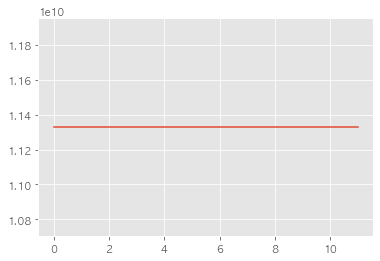

In [17]:
# 임시로 아무 데이터나 불러 와서 그려봄
a = sorted_df.loc[sorted_df['회사ID'] == company_id[0], :]
a['연매출액'].plot()

In [18]:
a # 데이터가 2018밖에 없어서 연매출액 정보의 변동이 없음

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
0,63,11328779396,2018,1,403119840,1006,2018-1
1,63,11328779396,2018,2,406770960,1018,2018-2
2,63,11328779396,2018,3,404826240,1013,2018-3
3,63,11328779396,2018,4,404211800,1012,2018-4
4,63,11328779396,2018,5,400339640,1002,2018-5
5,63,11328779396,2018,6,401083100,1011,2018-6
6,63,11328779396,2018,7,418169080,1009,2018-7
7,63,11328779396,2018,8,418292620,1011,2018-8
8,63,11328779396,2018,9,416186660,999,2018-9
9,63,11328779396,2018,10,414503020,996,2018-10


<AxesSubplot:>

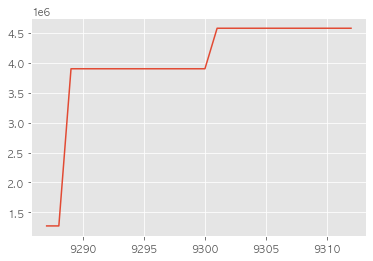

In [19]:
# 수개년 데이터가 있는 데이터를 임시로 뽑아봄
b = sorted_df.loc[sorted_df['회사ID'] == company_id[567], :]
b['연매출액'].plot()

In [20]:
b

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
9287,132007,1272598,2015,11,2338240,17,2015-11
9288,132007,1272598,2015,12,2242480,16,2015-12
9289,132007,3902273,2016,1,2137540,15,2016-1
9290,132007,3902273,2016,2,2698780,20,2016-2
9291,132007,3902273,2016,3,2886880,24,2016-3
9292,132007,3902273,2016,4,9839000,81,2016-4
9293,132007,3902273,2016,5,10406000,86,2016-5
9294,132007,3902273,2016,6,10639460,89,2016-6
9295,132007,3902273,2016,7,10993180,89,2016-7
9296,132007,3902273,2016,8,10993180,89,2016-8


상당 수 기업들의 1년치 자료만이 포함되어 있다. 이 경우, 연매출액은 1개의 값을 가질 수 밖에 없어 비교가 불가하다. 최소 2년치 이상의 자료를 포함하고 있는 기업을 따로 추출한다. 

In [21]:
over_2 =[] # 2개년도 이상 자료가 있는 회사 
over_3 =[] # 3개년도 이상 자료가 있는 회사 
over_4 =[] # 4개년도 이상 자료가 있는 회사 
for i in range(len(company_id)):
    year = sorted_df.loc[sorted_df['회사ID']==company_id[i]]['년도']
    year = list(set(year))
    if len(year) > 1:
        over_2.append(company_id[i])
    if len(year) > 2:
        over_3.append(company_id[i])
    if len(year) > 3:
        over_4.append(company_id[i])
    else:
        continue
# print(over_2)
print('2개년도 이상 자료가 있는 기업 수 : ', len(over_2))
# print(over_3)
print('3개년도 이상 자료가 있는 기업 수 : ', len(over_3))
# print(over_4)
print('4개년도 이상 자료가 있는 기업 수 : ', len(over_4))

2개년도 이상 자료가 있는 기업 수 :  2589
3개년도 이상 자료가 있는 기업 수 :  1645
4개년도 이상 자료가 있는 기업 수 :  862


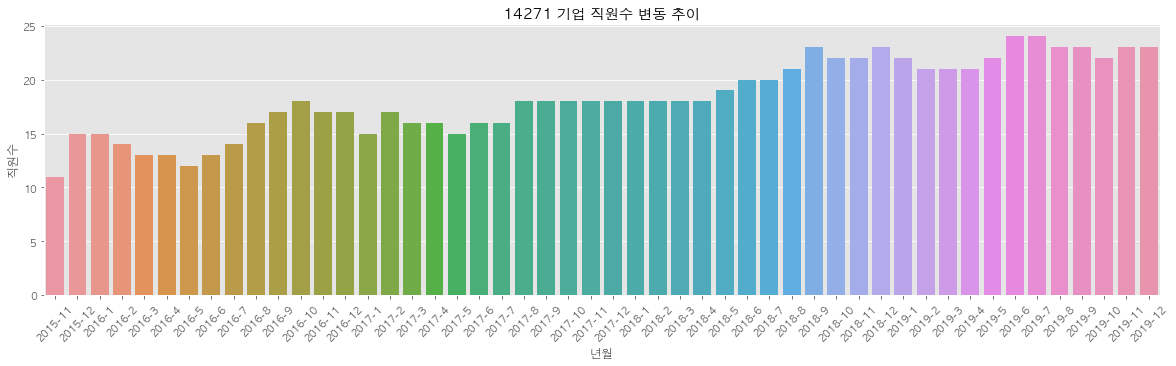

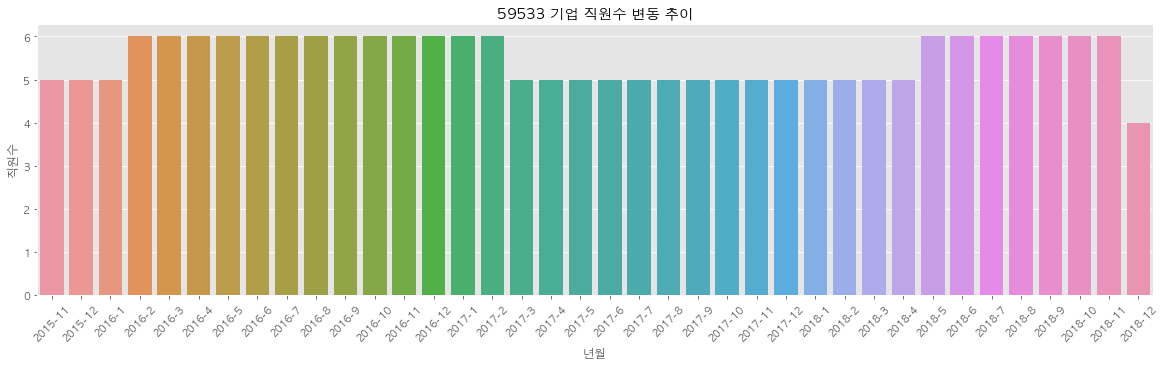

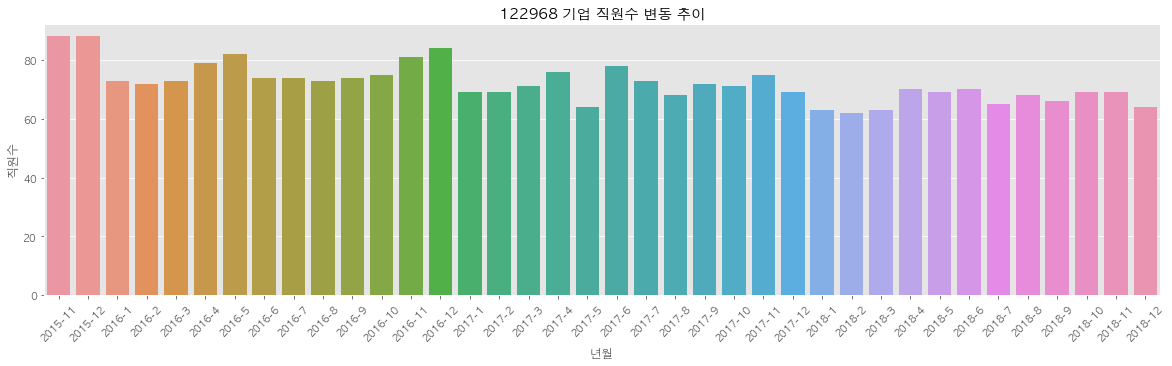

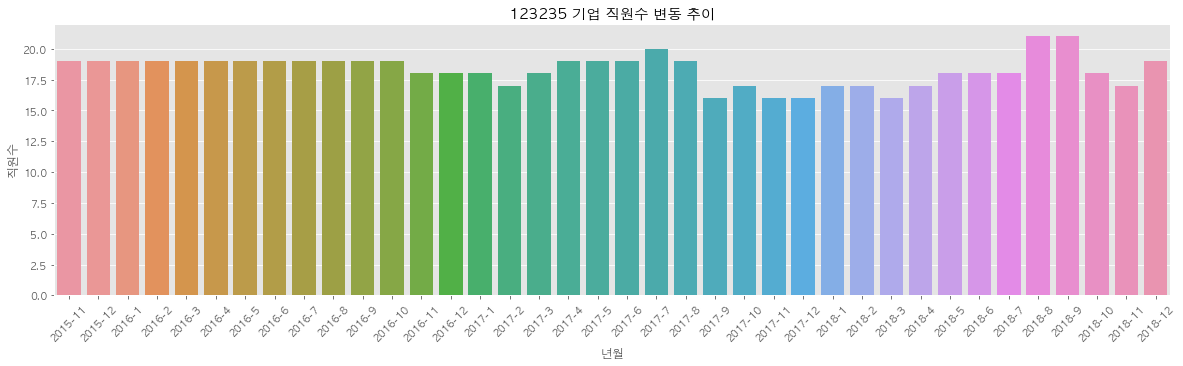

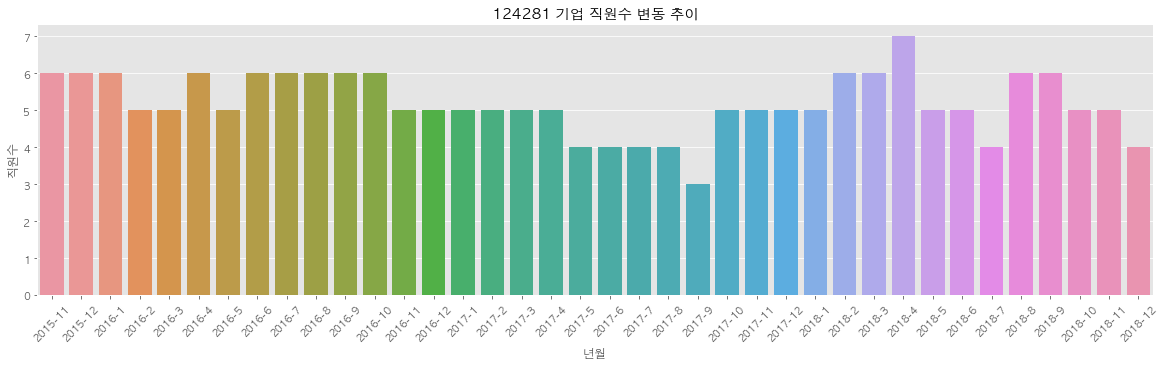

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4개년도 이상 자료가 있는 기업만 뽑아 월별 직원 수 변동 그래프 그리기 

# for i in range(len(over_4)):
for i in range(5):   # 일단 5개 기업만 그려본다. 
    com_4 = sorted_df.loc[sorted_df['회사ID']==over_4[i]]

    plt.figure(figsize=(20,5))
    sns.barplot(com_4['년월'], y=com_4['월별_직원수'])
    plt.title('{} 기업 직원수 변동 추이'.format(over_4[i]))
    plt.ylabel('직원수')
    plt.xticks(rotation=45)
    plt.show()

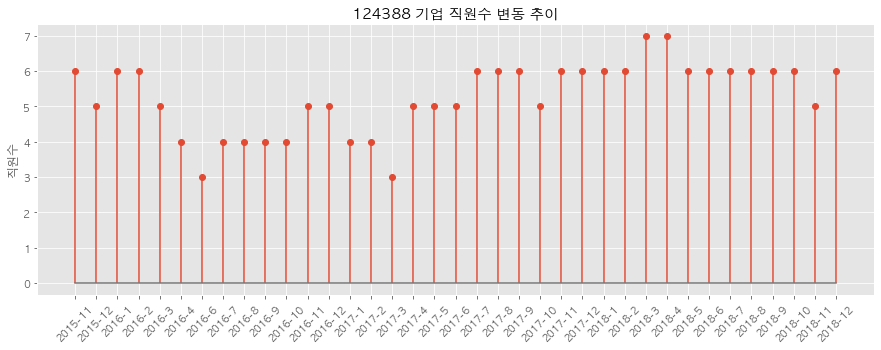

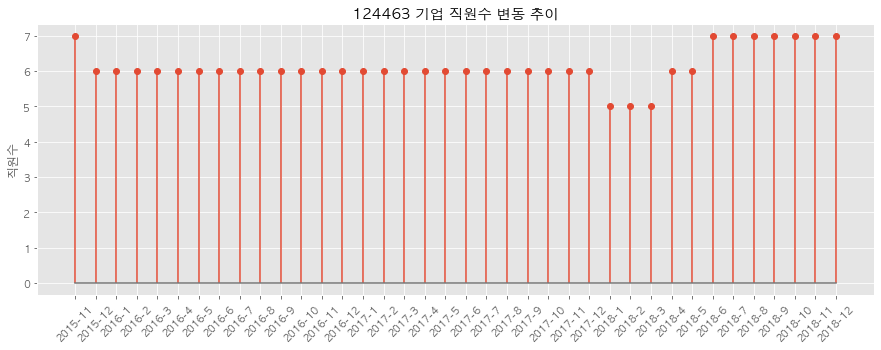

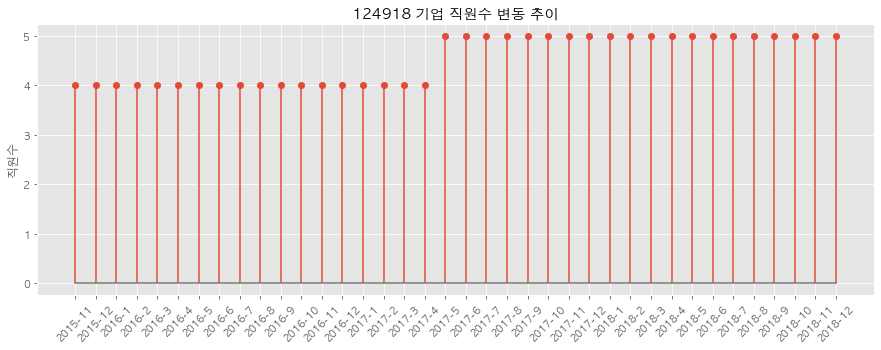

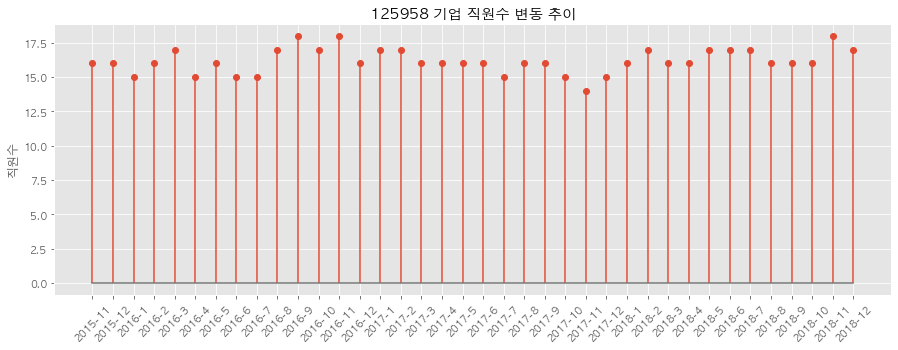

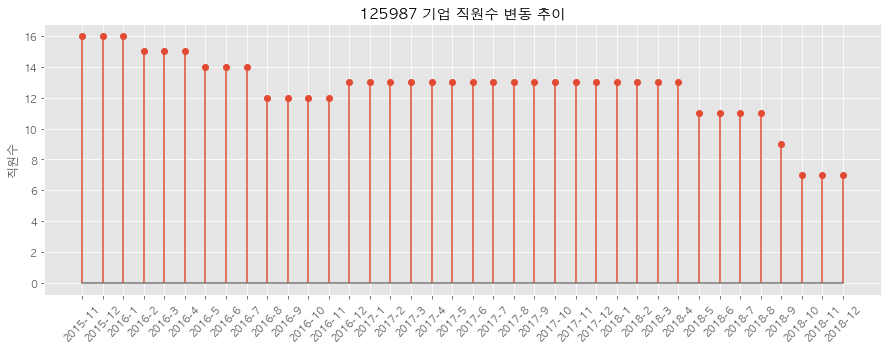

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4개년도 이상 자료가 있는 기업만 뽑아 월별 직원 수 변동 그래프 그리기 

# for i in range(len(over_4)):
for i in range(5,10):   # 이후 5개 기업
    com_4 = sorted_df.loc[sorted_df['회사ID']==over_4[i]]
    plt.figure(figsize=(15,5))

    x = com_4['년월']
    y = com_4['월별_직원수']
    plt.stem(x,y, use_line_collection=True)    
#     sns.barplot(com_4['년월'], y=com_4['월별_직원수'])
    plt.title('{} 기업 직원수 변동 추이'.format(over_4[i]))
    plt.ylabel('직원수')
    plt.xticks(rotation=45)
    plt.show()

### - 매출액증가율 구하기 

In [150]:
c = list(sorted_df.loc[sorted_df['회사ID']==14271]['연매출액'])
new =[]
for v in c:
    if v not in new:
        new.append(v)
print(new)

[1199495, 4257715, 5005248, 8388401, 9039340]


In [151]:
b = [0] # 매출액 증가율 담은 리스트
for i in range(1, len(new)):
    a = round((new[i]-new[i-1])/new[i-1]*100, 4)
    b.append(a)
print(b)

[0, 254.959, 17.5571, 67.5921, 7.76]


In [152]:
d = list(sorted_df.loc[sorted_df['회사ID']==14271]['년도'])
yy =[]
for v in d:
    if v not in yy:
        yy.append(v)
print(yy)

[2015, 2016, 2017, 2018, 2019]


In [161]:
# 데이터 프레임 만들기
sales = pd.DataFrame({'년도':yy, '매출액':new, '증가율':b})
sales['회사ID']=14271
sales

,년도,매출액,증가율,회사ID
0,2015,1199495,0.0000,14271
1,2016,4257715,254.9590,14271
2,2017,5005248,17.5571,14271
3,2018,8388401,67.5921,14271
4,2019,9039340,7.7600,14271


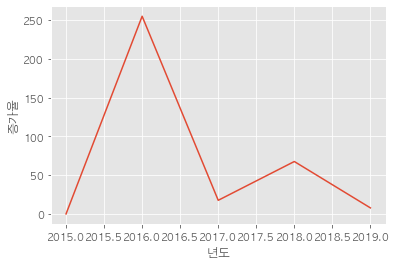

In [251]:
sns.lineplot(data=sales, x='년도', y='증가율')
plt.show()

In [208]:
# 회사 id별로 매출액 증가율 계산 
c = sorted_df.loc[sorted_df['회사ID']==14271, :]
c = c.drop_duplicates(['연매출액'], keep = 'first')
c['매출액증가율'] = 0

for i in range(1, len(c)):
    c['매출액증가율'].iloc[i] = round((c['연매출액'].iloc[i]-c['연매출액'].iloc[i-1])/c['연매출액'].iloc[i-1]*100, 4)
c

# sorted_df.drop_duplicates(['연매출액'], keep = 'last') # 매출액 같은 기업은 제외됨

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,매출액증가율
604,14271,1199495,2015,11,2571840,11,2015-11,0.0000
606,14271,4257715,2016,1,3358340,15,2016-1,254.9590
618,14271,5005248,2017,1,3412760,15,2017-1,17.5571
630,14271,8388401,2018,1,3851360,18,2018-1,67.5921
642,14271,9039340,2019,1,4519140,22,2019-1,7.7600


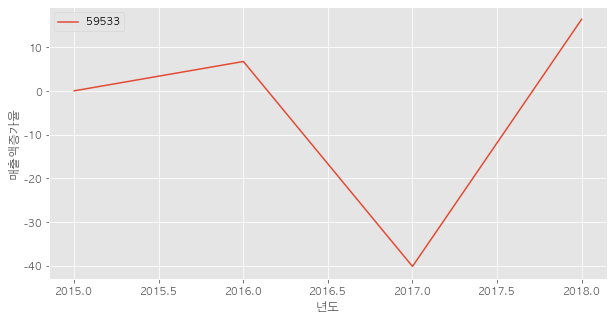

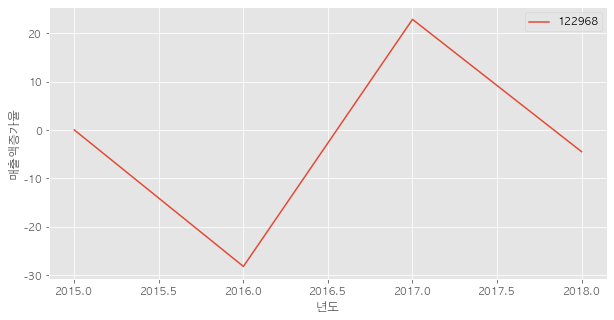

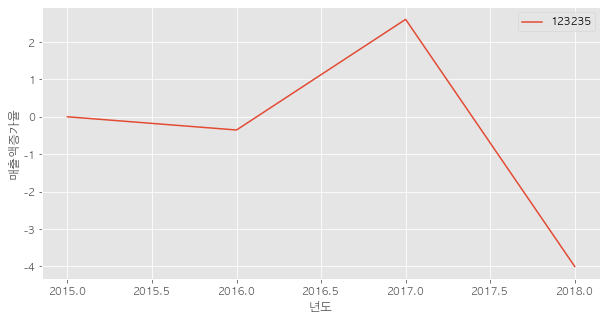

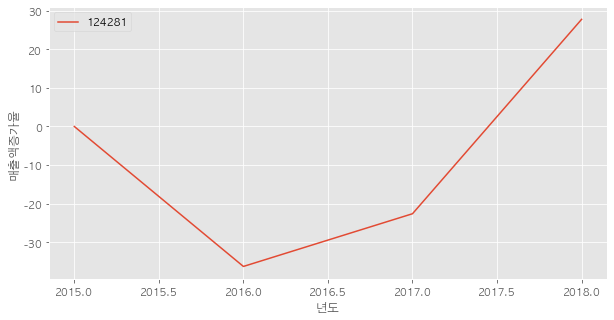

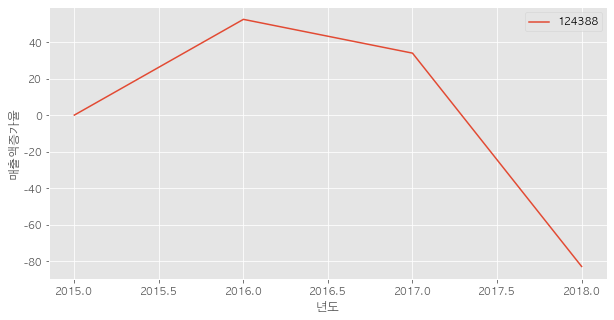

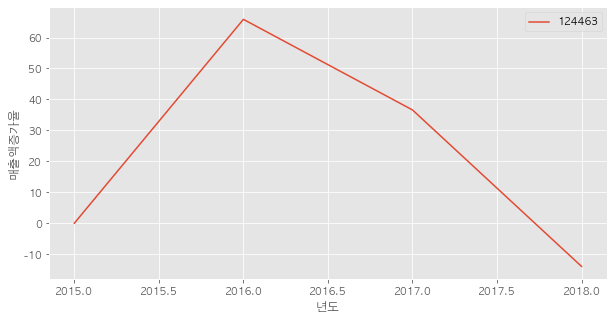

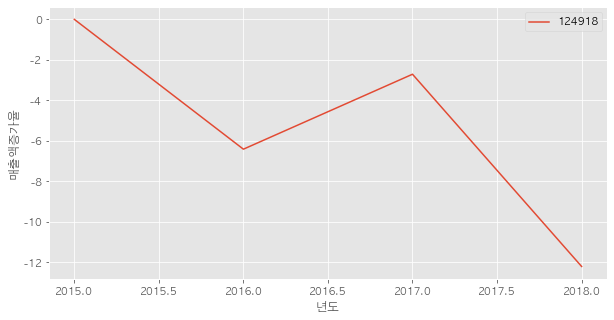

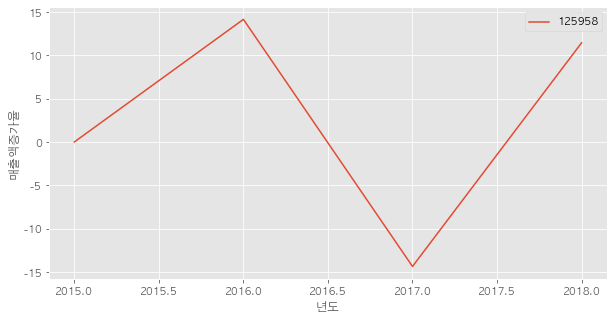

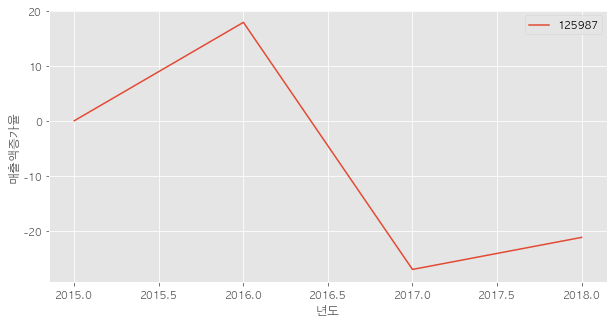

In [249]:

for i in range(1, 10):
    c = sorted_df.loc[sorted_df['회사ID']==over_4[i], :]
    c = c.drop_duplicates(['연매출액'], keep = 'first')
    c['매출액증가율'] = 0

    for j in range(1, len(c)):
        c['매출액증가율'].iloc[j] = round((c['연매출액'].iloc[j]-c['연매출액'].iloc[j-1])/c['연매출액'].iloc[j-1]*100, 4)
    plt.figure(figsize=(10,5))
    sns.lineplot(data=c, x='년도', y='매출액증가율', label=over_4[i])
    plt.show()


## 2. 자료상 최신 자료에 따른 분류

In [35]:
# 데이터 상 기업별 가장 최근 데이터만 남긴다. 

latest = sorted_df.drop_duplicates('회사ID', keep='last')
latest

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
11,63,11328779396,2018,12,419953960,1014,2018-12
23,95,656947437,2018,12,211122800,522,2018-12
31,102,742658938,2018,12,178682220,784,2018-12
39,295,83776697,2018,12,73774760,255,2018-12
51,414,19732769,2018,12,79522000,246,2018-12
...,...,...,...,...,...,...,...
99787,2400284,1263406,2018,10,549080,3,2018-10
99788,2437574,214016,2018,5,636740,3,2018-5
99794,2693684,238076,2019,12,438120,3,2019-12
99799,3312354,1451563,2019,12,1312200,3,2019-12


### 1) 매출액 상위 기업

In [40]:
# 매출액이 가장 많은 상위 10개 기업
latest.sort_values(by='연매출액', ascending=False).head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
11,63,11328779396,2018,12,419953960,1014,2018-12
83141,419945,10058868796,2019,12,952530380,2872,2019-12
38145,227415,5521038494,2018,12,918867780,2333,2018-12
38107,227414,4933525226,2018,12,964790780,2435,2018-12
83177,419977,4157069000,2018,12,403793080,1205,2018-12
56362,294649,4152465961,2018,12,112239260,278,2018-12
83213,419998,3512597764,2018,12,318945420,813,2018-12
6117,126831,2206140616,2018,12,245142900,587,2018-12
74329,381180,1618894425,2018,12,65983520,165,2018-12
83249,420008,1301747031,2018,12,294177160,729,2018-12


In [45]:
# 매출액 상위 10개 기업만 별도 추출
top_sales = latest.sort_values(by='연매출액', ascending=False).head(10)
top_sales_id = list(top_sales['회사ID'])
top_sales_id

[63, 419945, 227415, 227414, 419977, 294649, 419998, 126831, 381180, 420008]

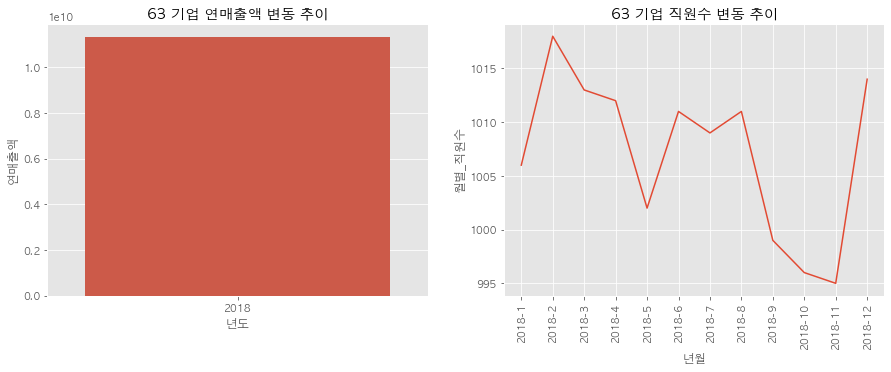

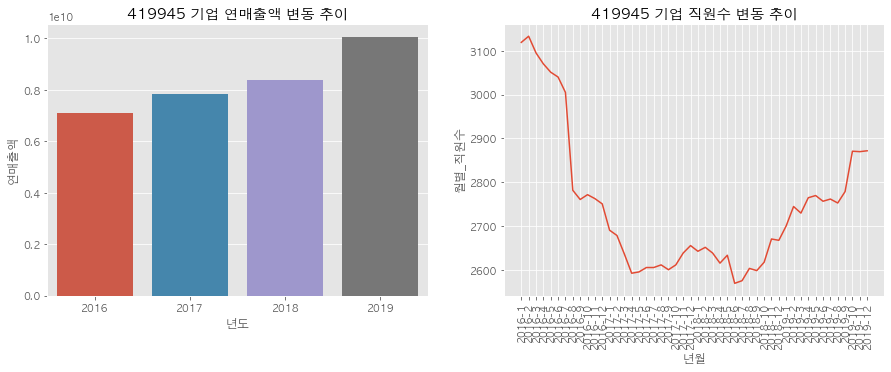

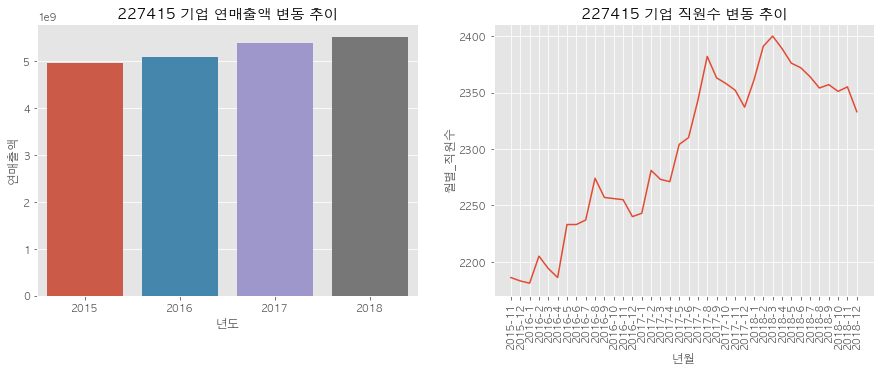

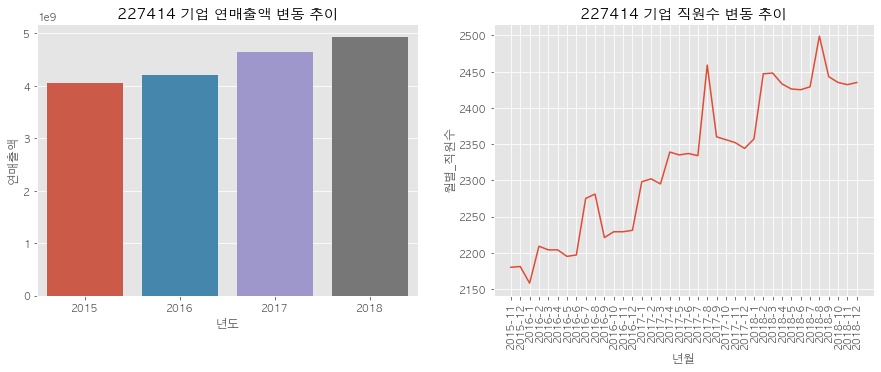

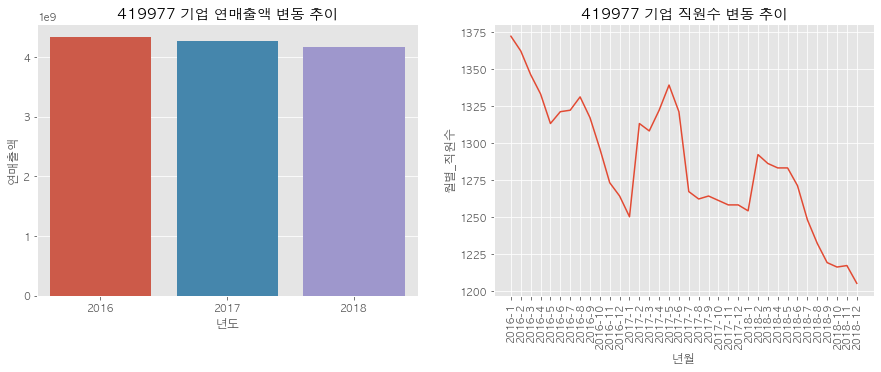

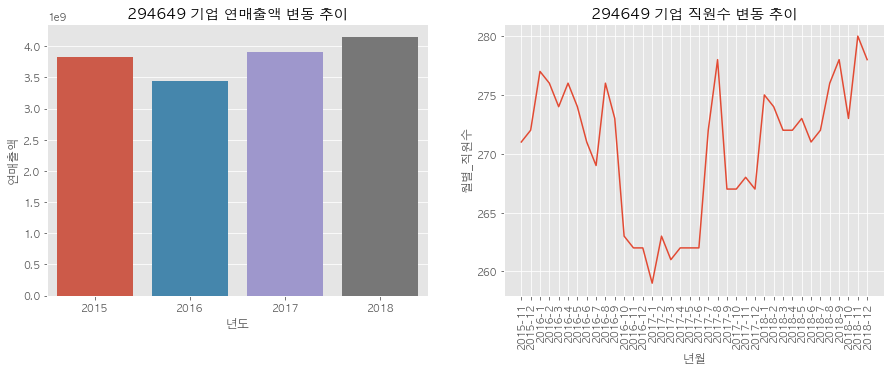

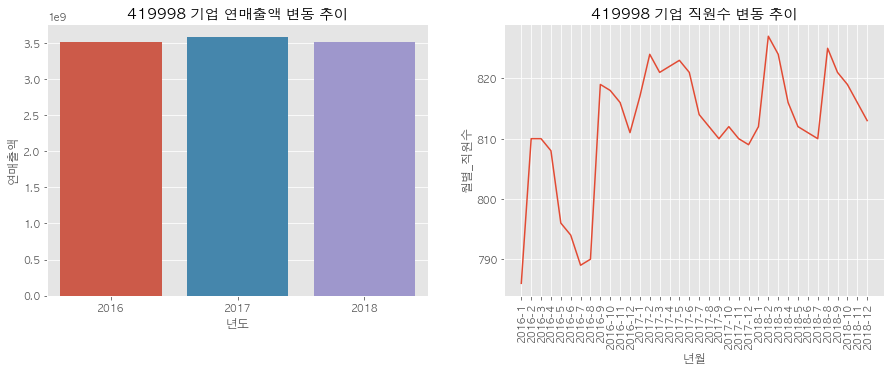

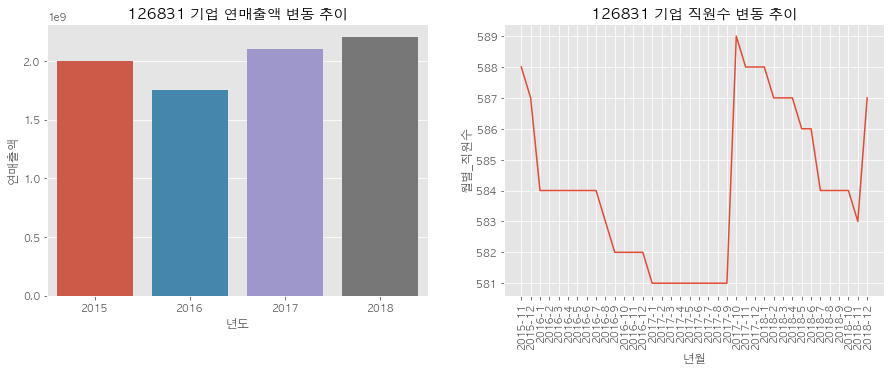

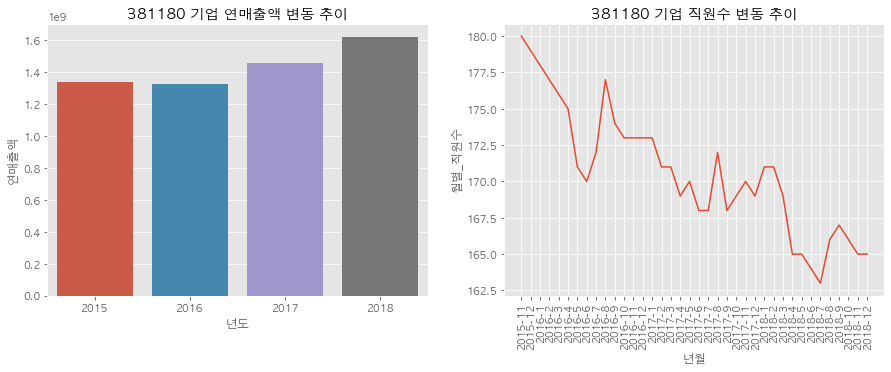

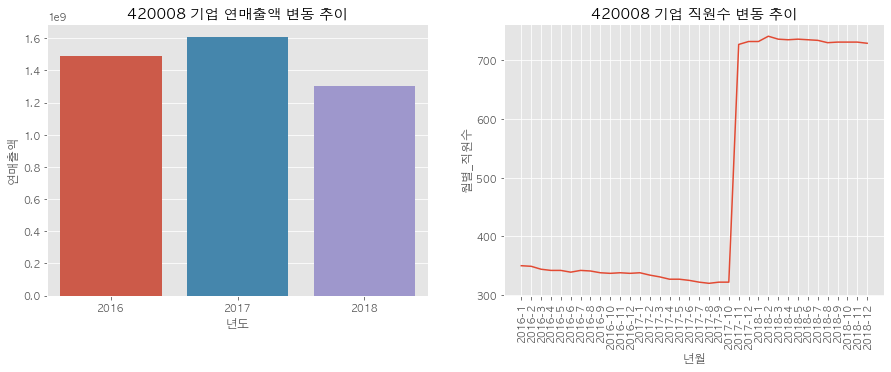

In [56]:
# 매출액 상위 10개 기업 연매출 및 직원수 변동 그래프 
for i in range(len(top_sales_id)):
    temp = sorted_df.loc[sorted_df['회사ID']==top_sales_id[i]]

    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.barplot(temp['년도'], y=temp['연매출액'])
    plt.title('{} 기업 연매출액 변동 추이'.format(top_sales_id[i]))
    plt.ylabel('연매출액')
    plt.subplot(122)
    sns.lineplot(temp['년월'], y=temp['월별_직원수'])
    plt.xticks(rotation=90)
    plt.title('{} 기업 직원수 변동 추이'.format(top_sales_id[i]))
    plt.show()

### 2) 매출액 하위 기업

In [39]:
# 매출액이 가장 적은 10개 기업
latest.sort_values(by='연매출액', ascending=True).head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
99178,566173,300,2018,12,1125000,4,2018-12
3363,81619,507,2018,12,2151000,6,2018-12
99015,552832,1471,2018,10,692540,3,2018-10
99253,570867,1500,2019,12,904500,4,2019-12
82319,413746,2000,2015,12,407960,4,2015-12
51592,265937,2000,2018,12,1175920,6,2018-12
32975,193144,3143,2015,12,680940,6,2015-12
4086,108773,3200,2018,12,850040,4,2018-12
98994,551065,3868,2018,12,509400,3,2018-12
99101,560742,3960,2018,12,707800,5,2018-12


In [60]:
# 매출액 하위 10개 기업만 별도 추출
lower_sales = latest.sort_values(by='연매출액', ascending=True).head(10)
lower_sales_id = list(lower_sales['회사ID'])
lower_sales_id

[566173, 81619, 552832, 570867, 413746, 265937, 193144, 108773, 551065, 560742]

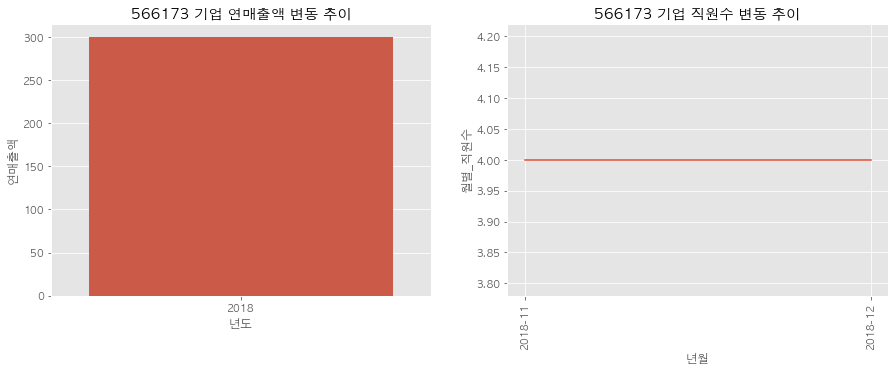

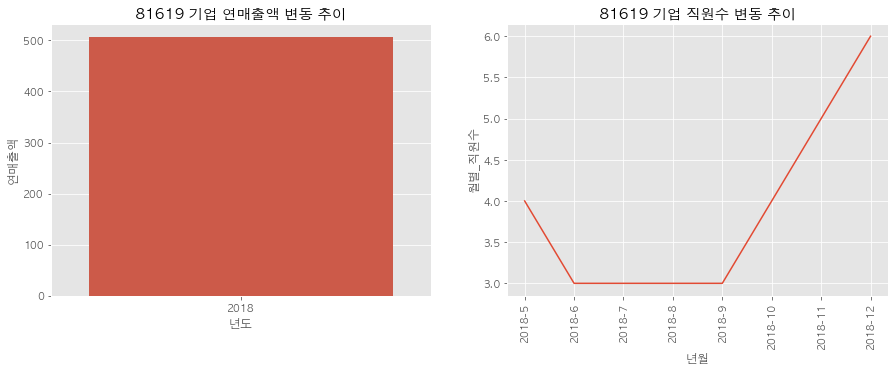

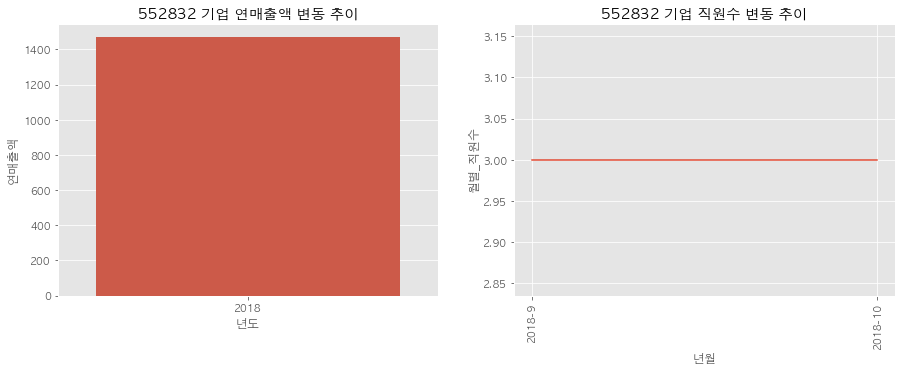

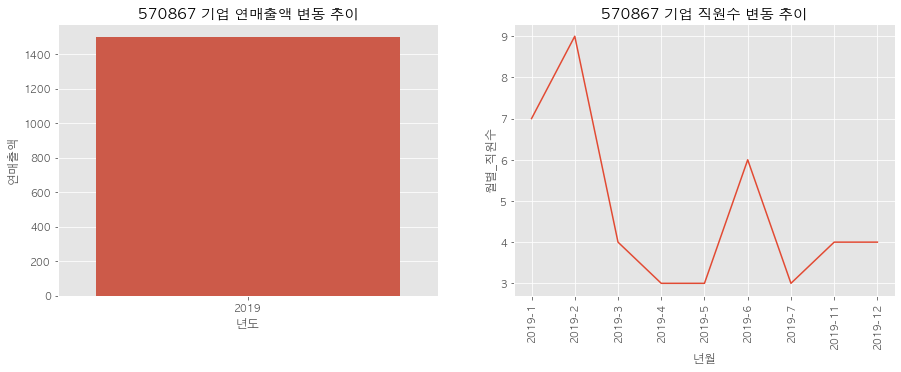

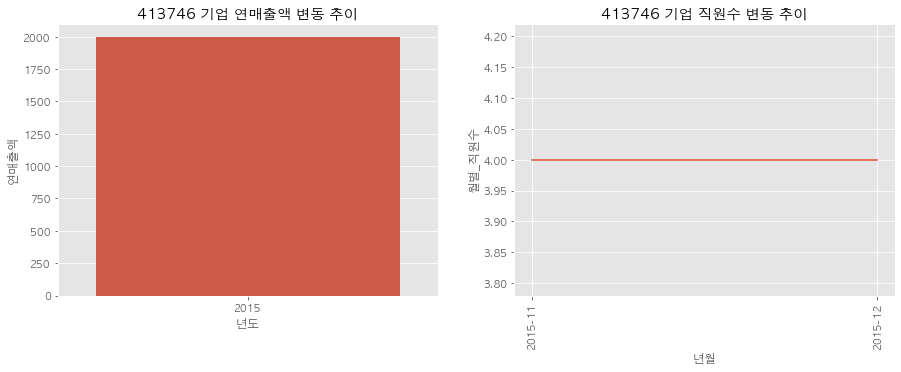

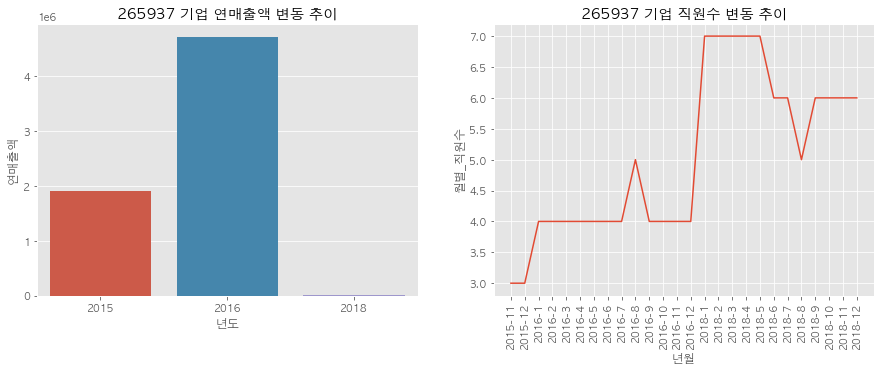

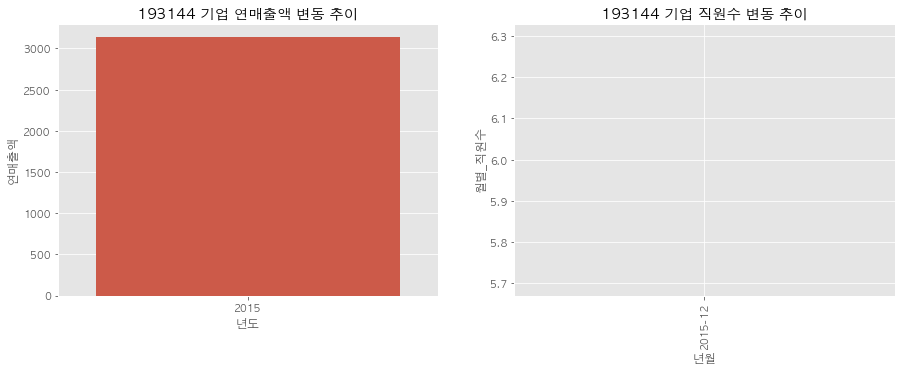

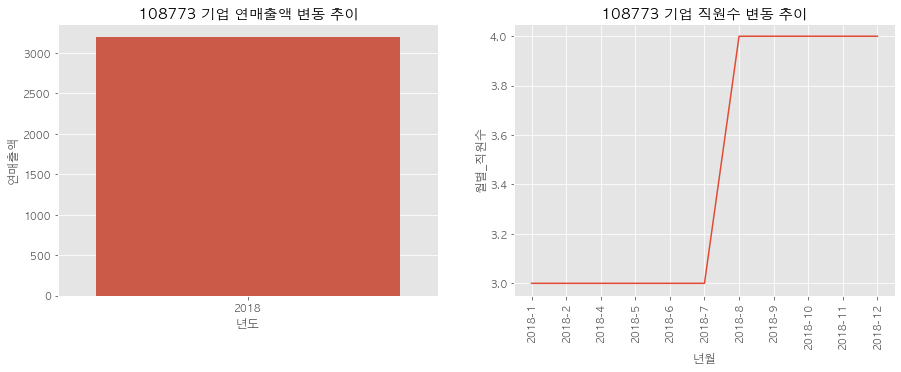

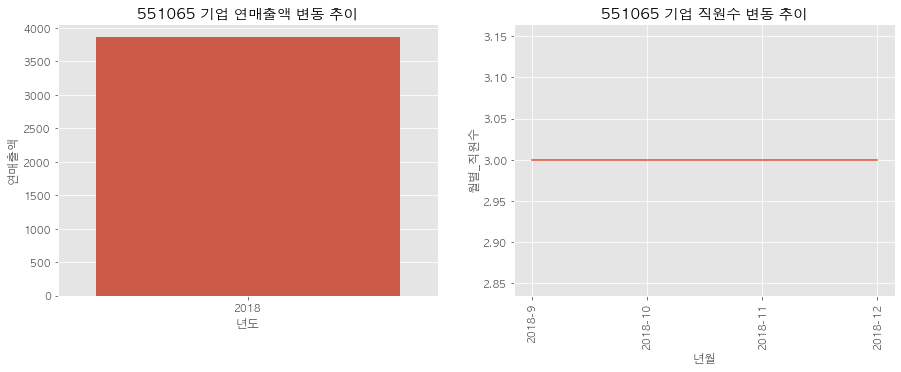

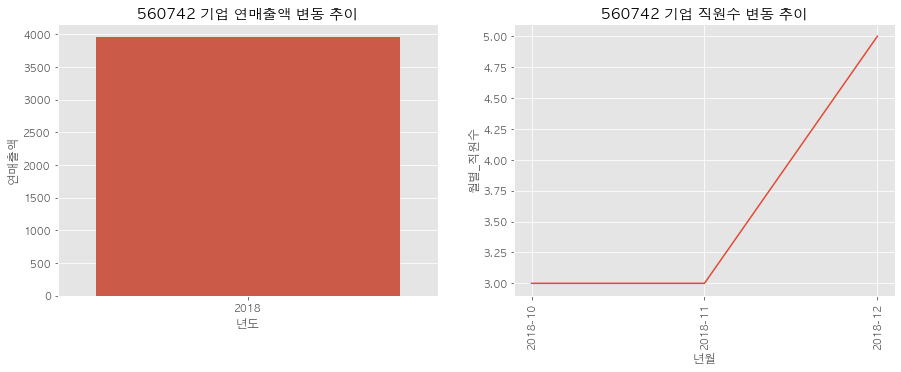

In [61]:
# 매출액 하위 10개 기업 연매출 및 직원수 변동 그래프 
for i in range(len(lower_sales_id)):
    temp = sorted_df.loc[sorted_df['회사ID']==lower_sales_id[i]]

    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.barplot(temp['년도'], y=temp['연매출액'])
    plt.title('{} 기업 연매출액 변동 추이'.format(lower_sales_id[i]))
    plt.ylabel('연매출액')
    plt.subplot(122)
    sns.lineplot(temp['년월'], y=temp['월별_직원수'])
    plt.xticks(rotation=90)
    plt.title('{} 기업 직원수 변동 추이'.format(lower_sales_id[i]))
    plt.show()

### 3) 직원수에 따른 분류

In [43]:
# 직원수 상위
latest.sort_values(by='월별_직원수', ascending=False).head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
83141,419945,10058868796,2019,12,952530380,2872,2019-12
92716,469458,113442446,2017,12,527191920,2723,2017-12
38107,227414,4933525226,2018,12,964790780,2435,2018-12
38145,227415,5521038494,2018,12,918867780,2333,2018-12
56172,294337,287134819,2018,12,489855720,2258,2018-12
92754,469473,73804911,2018,12,329393240,1971,2018-12
86614,439902,309441718,2015,12,489856920,1824,2015-12
5801,126521,567246558,2018,12,539074160,1488,2018-12
78207,403351,415269293,2018,12,375108820,1379,2018-12
5839,126538,721901349,2018,12,422723060,1263,2018-12


In [137]:
# 직원수 하위
latest.sort_values(by='월별_직원수', ascending=True).head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월
37071,217292,245945,2016,6,0,0,2016-6
86574,439536,237277,2016,10,0,0,2016-10
21861,157237,27020003,2017,5,0,0,2017-5
99471,602137,892176,2018,6,0,0,2018-6
55435,288014,3709457,2016,11,0,0,2016-11
73789,374565,737102,2018,12,1013840,3,2018-12
73777,374556,4705997,2016,7,641060,3,2016-7
73774,373684,1260940,2018,12,439380,3,2018-12
73765,373676,6668994,2018,12,460520,3,2018-12
73753,373322,1130277,2016,12,364940,3,2016-12
